# KNN Model

### Install Libraries
* **`wordcloud`** A word cloud generator in Python that we used to visualize our dataset

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import random
import re
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Loading Dataset

In [3]:
FILENAME = './HateSpeechDatasetBalanced.csv'
df = pd.read_csv(FILENAME)

print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['Label'].value_counts()}")
print(f"\nFirst few rows:\n{df.head()}")

Dataset shape: (726119, 2)

Class distribution:
Label
1    364525
0    361594
Name: count, dtype: int64

First few rows:
                                             Content  Label
0  denial of normal the con be asked to comment o...      1
1  just by being able to tweet this insufferable ...      1
2  that is retarded you too cute to be single tha...      1
3  thought of a real badass mongol style declarat...      1
4                                afro american basho      1


### Cleaning dataset
* Remove punctuation
* Remove links
* Remove user mentions and hashtags
* Remove numbers
* Convert text to lowercase

In [22]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['Content'] = df['Content'].apply(clean_text)
print("Dataset text cleaned.")

Dataset text cleaned.


### Exploratory & Unsupervised Analysis of Dataset
* Histogram of words and their frequency of appearance

In [23]:
def word_frequencies(texts):
    frequencies = defaultdict(int)
    for text in texts:
        for word in text.split():
            frequencies[word.lower()] += 1
    return frequencies

all_texts = df['Content'].values
all_texts_frequencies = word_frequencies(all_texts)

hate_texts = df[df['Label'] == 1]['Content'].values
hate_texts_frequencies = word_frequencies(hate_texts)

nonhate_texts = df[df['Label'] == 0]['Content'].values
nonhate_texts_frequencies = word_frequencies(nonhate_texts)

print(f"\nTotal unique words in dataset: {len(all_texts_frequencies):,}")
print(f"Total unique words in hateful texts: {len(hate_texts_frequencies):,}")
print(f"Total unique words in non-hateful texts: {len(nonhate_texts_frequencies):,}")


Total unique words in dataset: 136,620
Total unique words in hateful texts: 58,546
Total unique words in non-hateful texts: 121,188


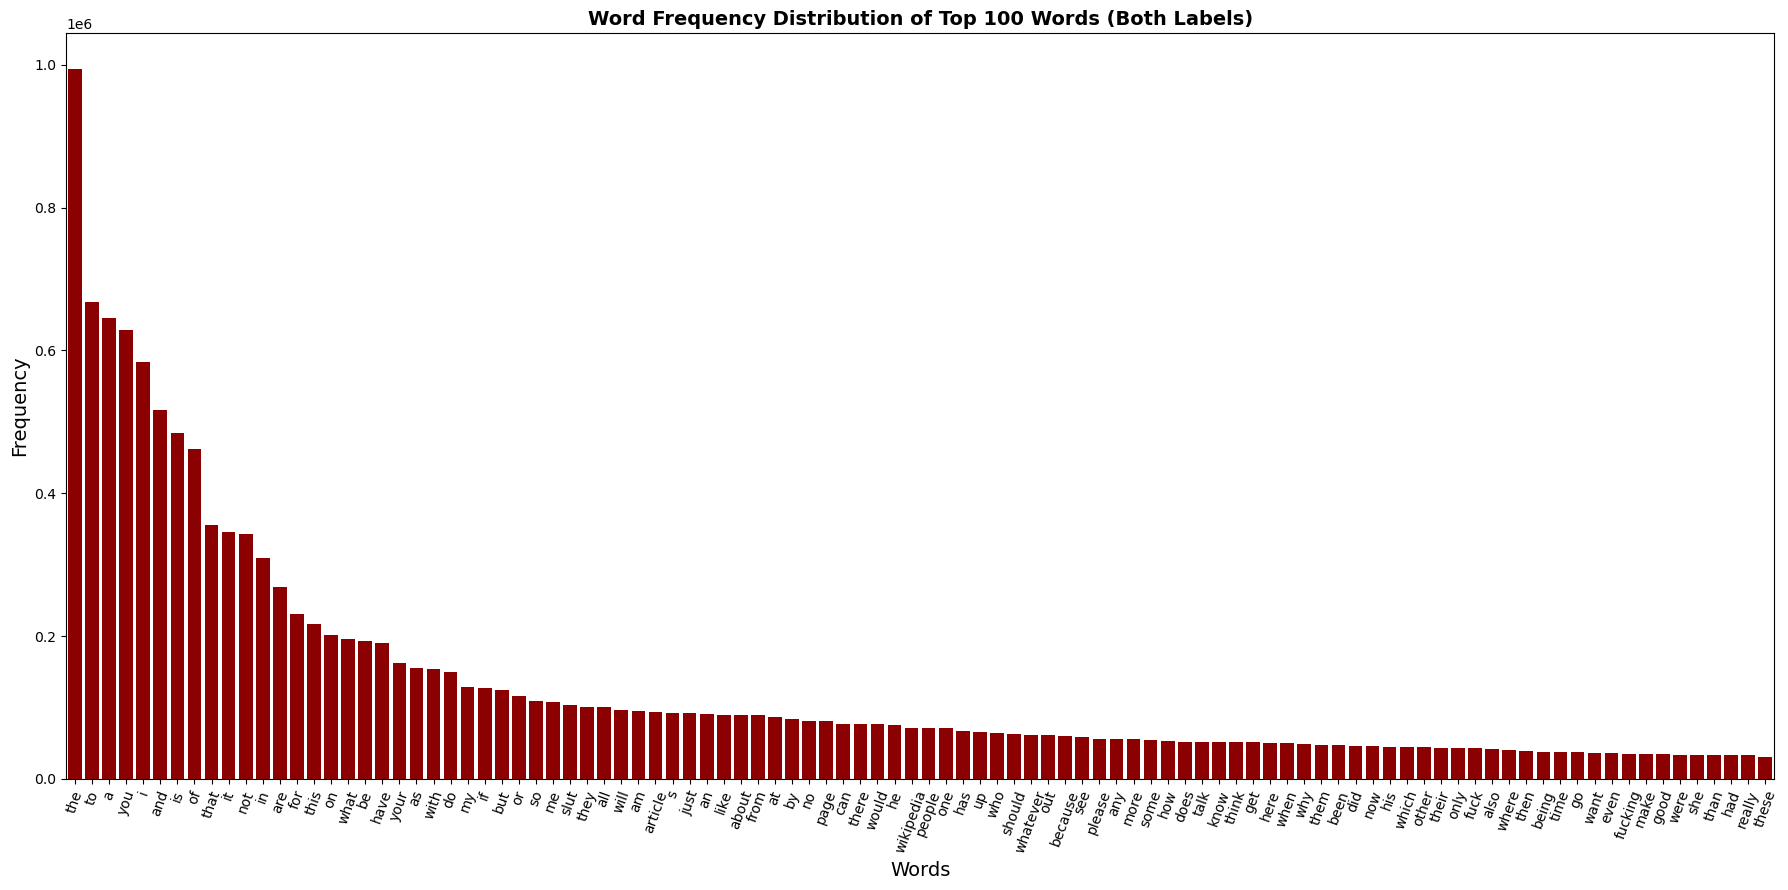

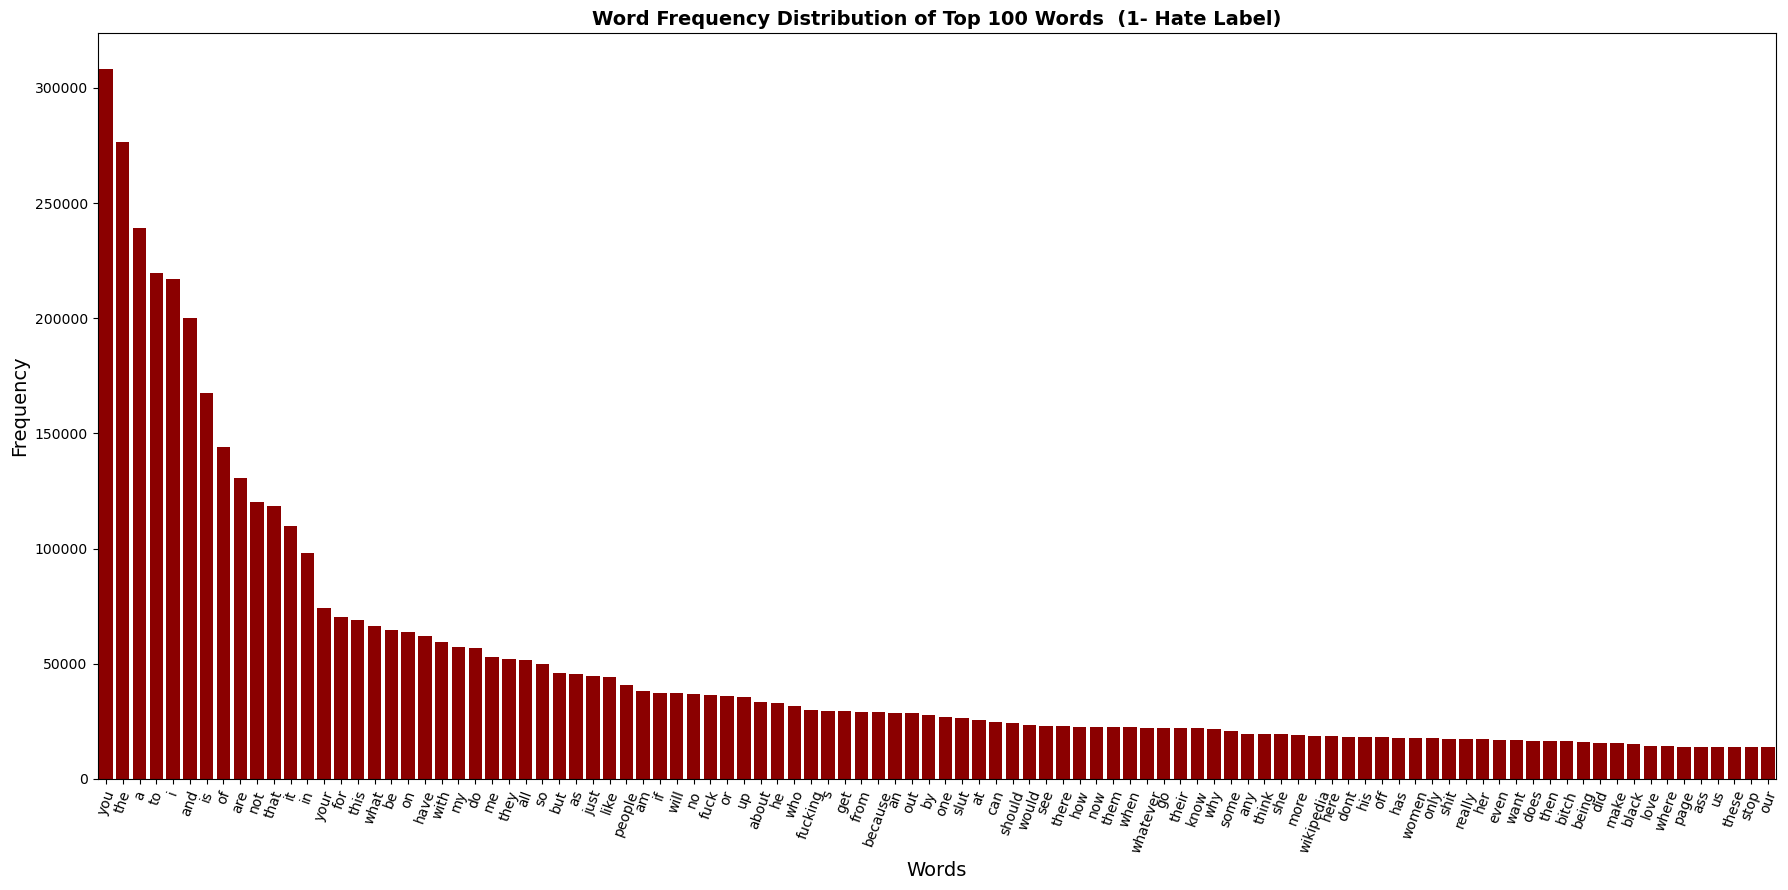

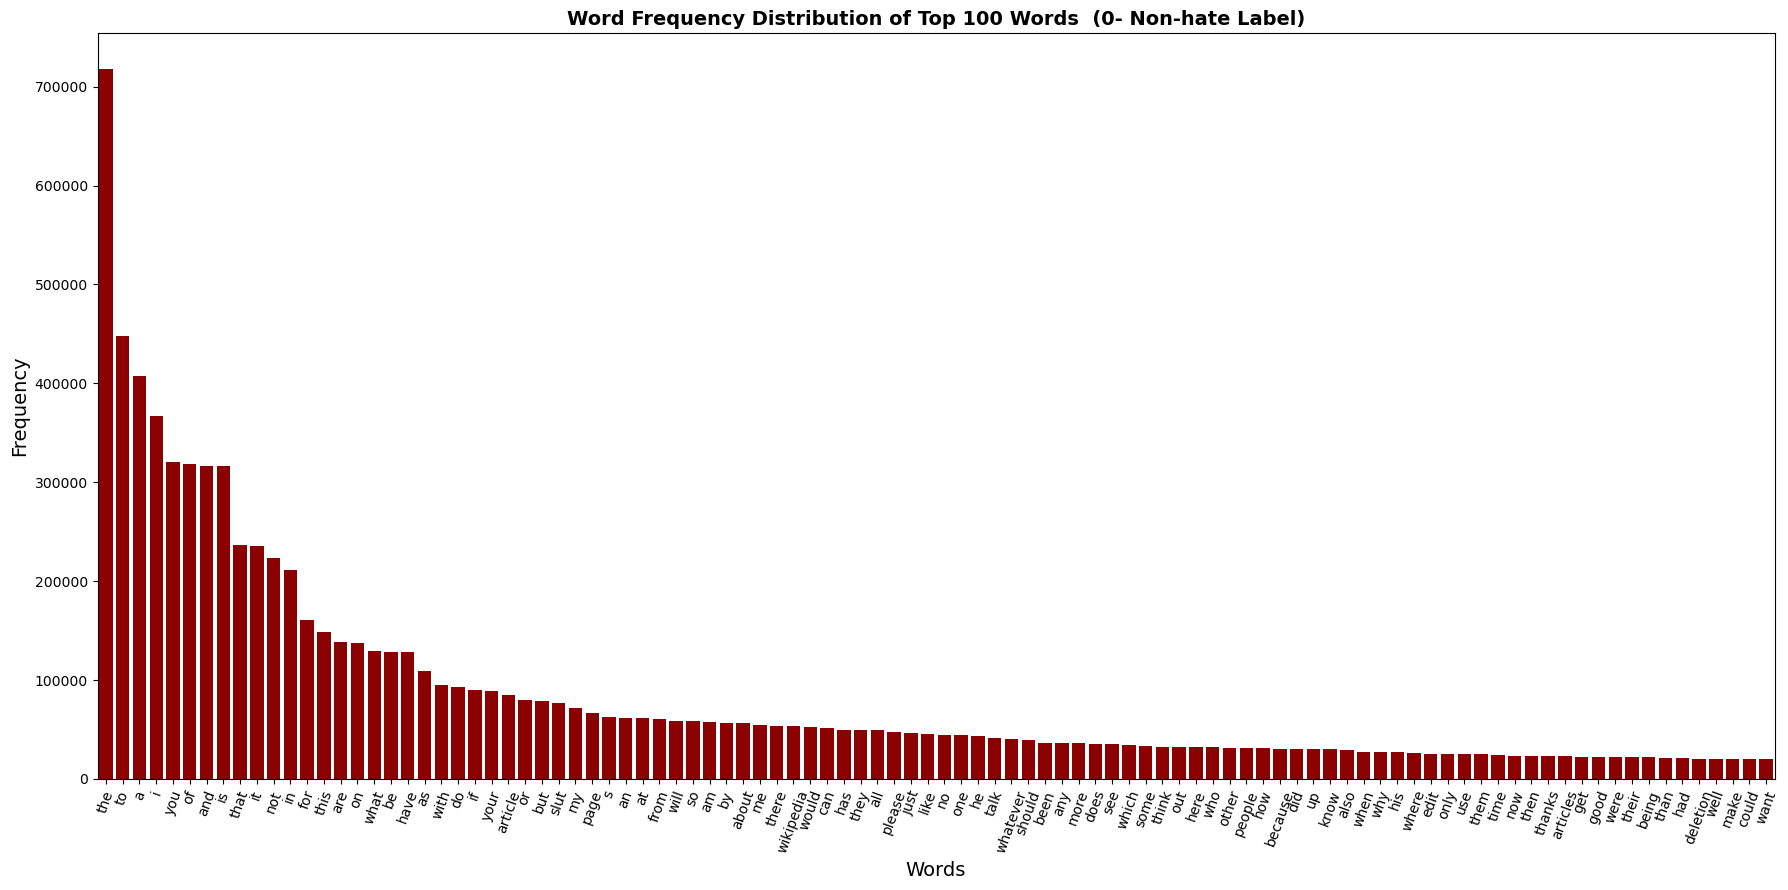

In [24]:
sorted_all = sorted(all_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_all = sorted_all[:100] # Top 100 words
sorted_hate = sorted(hate_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_hate = sorted_hate[:100] # Top 400 words
sorted_nonhate = sorted(nonhate_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_nonhate = sorted_nonhate[:100] # Top 400 words

words = [ item[0] for item in sorted_all ]
counts = [ item[1] for item in sorted_all ]


plt.figure(figsize=(18, 9))
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Frequency Distribution of Top 100 Words (Both Labels)', fontsize=14, fontweight='bold')
plt.bar(words, counts, color='darkred')
plt.xlim(-0.5, len(words) - 0.5)
plt.xticks(rotation=70, ha='center')
plt.tight_layout()
plt.show()

words = [ item[0] for item in sorted_hate ]
counts = [ item[1] for item in sorted_hate ]

plt.figure(figsize=(18, 9))
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Frequency Distribution of Top 100 Words  (1- Hate Label)', fontsize=14, fontweight='bold')
plt.bar(words, counts, color='darkred')
plt.xlim(-0.5, len(words) - 0.5)
plt.xticks(rotation=70, ha='center')
plt.tight_layout()
plt.show()

words = [ item[0] for item in sorted_nonhate ]
counts = [ item[1] for item in sorted_nonhate ]

plt.figure(figsize=(18, 9))
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Frequency Distribution of Top 100 Words  (0- Non-hate Label)', fontsize=14, fontweight='bold')
plt.bar(words, counts, color='darkred')
plt.xlim(-0.5, len(words) - 0.5)
plt.xticks(rotation=70, ha='center')
plt.tight_layout()
plt.show()

* Word cloud for hateful text (label=1) and non-hateful text (label=0)

Text(0.5, 1.0, 'Non-hate Speech Word Cloud')

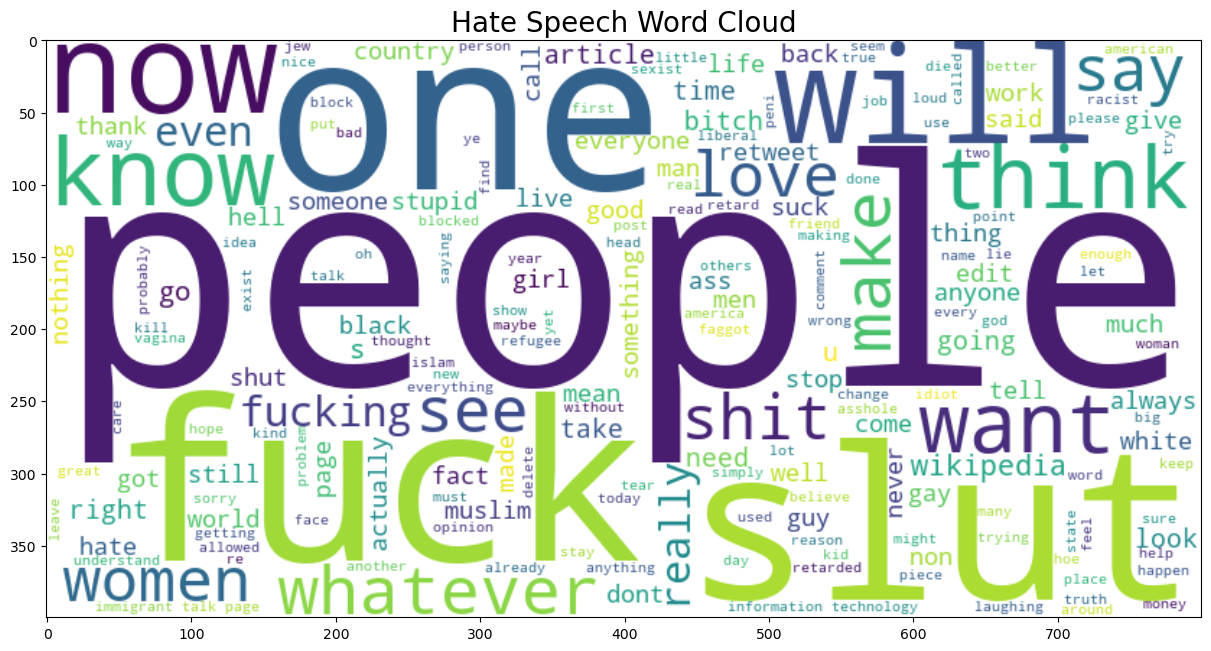

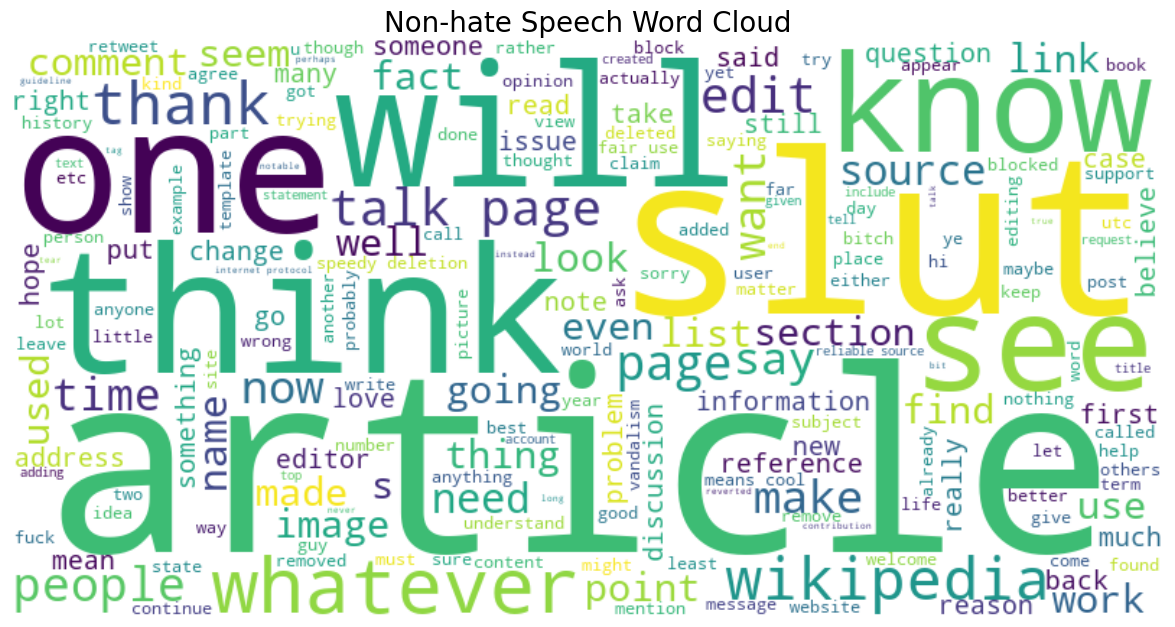

In [ ]:
nonhate_wordcloud = ' '.join(df[df['Label'] == 0]['Content'].values)
hate_wordcloud = ' '.join(df[df['Label'] == 1]['Content'].values) 

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(hate_wordcloud)
plt.figure(figsize=(15, 7.5))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Hate Speech Word Cloud", fontsize=20)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(nonhate_wordcloud)
plt.figure(figsize=(15, 7.5))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Non-hate Speech Word Cloud", fontsize=20)

### Preprocessing the Data